In [47]:
from keras.models import load_model,Sequential
from keras.layers import Input, Dense, LSTM,Dropout
from keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint


import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix

def signal_to_catagorical(data):
    data.loc[data['Signal'] == 'wait ot hold', 'Signal'] = 'wait or hold'
    data.loc[data['Signal'] == 'buy', 'Signal'] = 0
    data.loc[data['Signal'] == 'sell', 'Signal'] = 1 
    data.loc[data['Signal'] == 'wait or hold', 'Signal'] = 2 
    return data

def add_shift_day(data,day):
    r_list = []
    for i in range(day,len(data)):#Number mean day to shift
        r_list.append(data[i-day : i])
    return np.array(r_list)



In [50]:
datalist = [f for f in glob.glob("Dataset2/*.csv")]
print('have stock = ',len(datalist))


have stock =  77


In [51]:
#validation 
val_list = []
for val_name in range(71,74):
    df = pd.read_csv(datalist[val_name])
    val_x = df[['MACD-SL_n','DMI_n','Close_n','RSI_n','%R_n','Signal']]
    # val_x = add_shift_day(val_x,30)
    val_list.append(val_x)

#test
test_list = []
for test_name in range(75,77):
    df = pd.read_csv(datalist[test_name])
    test = df[['MACD-SL_n','DMI_n','Close_n','RSI_n','%R_n','Signal','Close']]
    # test = add_shift_day(test,30)
    test_list.append(test)


In [70]:
model = Sequential()
model.add(LSTM(100, input_shape=((30,5)),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

checkpoint = ModelCheckpoint('Model/lstm_model_macd_dmi_rsi_%r_4.h5',
                               verbose=1,
                               monitor='val_acc',
                               mode='max',
                               save_best_only = True)



Epoch 1/1000
93/94 [============================>.] - ETA: 0s - loss: 0.8280 - acc: 0.6905
Epoch 00001: val_acc improved from -inf to 0.70580, saving model to Model\lstm_model_macd_dmi_rsi_%r_4.h5
94/94 [==============================] - 8s 89ms/step - loss: 0.8256 - acc: 0.6923 - val_loss: 0.7280 - val_acc: 0.7058
Epoch 2/1000
94/94 [==============================] - ETA: 0s - loss: 0.6867 - acc: 0.7163- ETA
Epoch 00002: val_acc improved from 0.70580 to 0.71497, saving model to Model\lstm_model_macd_dmi_rsi_%r_4.h5
94/94 [==============================] - 7s 78ms/step - loss: 0.6867 - acc: 0.7163 - val_loss: 0.6897 - val_acc: 0.7150
Epoch 3/1000
93/94 [============================>.] - ETA: 0s - loss: 0.6649 - acc: 0.7103
Epoch 00003: val_acc did not improve from 0.71497
94/94 [==============================] - 8s 81ms/step - loss: 0.6633 - acc: 0.7120 - val_loss: 0.6668 - val_acc: 0.7150
Epoch 4/1000
93/94 [============================>.] - ETA: 0s - loss: 0.6500 - acc: 0.7077
Epoch 

93/94 [============================>.] - ETA: 0s - loss: 0.5172 - acc: 0.7550
Epoch 00031: val_acc did not improve from 0.71570
94/94 [==============================] - 8s 88ms/step - loss: 0.5161 - acc: 0.7554 - val_loss: 0.7387 - val_acc: 0.7117
Epoch 32/1000
93/94 [============================>.] - ETA: 0s - loss: 0.4966 - acc: 0.7648
Epoch 00032: val_acc did not improve from 0.71570
94/94 [==============================] - 7s 78ms/step - loss: 0.4960 - acc: 0.7645 - val_loss: 0.7404 - val_acc: 0.6930
Epoch 33/1000
94/94 [==============================] - ETA: 0s - loss: 0.5294 - acc: 0.7524- ETA: 0s - loss: 0.5163 - acc
Epoch 00033: val_acc did not improve from 0.71570
94/94 [==============================] - 9s 91ms/step - loss: 0.5294 - acc: 0.7524 - val_loss: 0.7707 - val_acc: 0.6787
Epoch 34/1000
93/94 [============================>.] - ETA: 0s - loss: 0.5364 - acc: 0.7403- ETA: 1s - loss:
Epoch 00034: val_acc did not improve from 0.71570
94/94 [==============================] 

Epoch 62/1000
94/94 [==============================] - ETA: 0s - loss: 0.2069 - acc: 0.9191
Epoch 00062: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 102ms/step - loss: 0.2069 - acc: 0.9191 - val_loss: 1.4269 - val_acc: 0.6401
Epoch 63/1000
94/94 [==============================] - ETA: 0s - loss: 0.1717 - acc: 0.9369
Epoch 00063: val_acc did not improve from 0.71570
94/94 [==============================] - 9s 99ms/step - loss: 0.1717 - acc: 0.9369 - val_loss: 1.4985 - val_acc: 0.6346
Epoch 64/1000
94/94 [==============================] - ETA: 0s - loss: 0.2302 - acc: 0.9115
Epoch 00064: val_acc did not improve from 0.71570
94/94 [==============================] - 11s 114ms/step - loss: 0.2302 - acc: 0.9115 - val_loss: 1.2959 - val_acc: 0.6174
Epoch 65/1000
94/94 [==============================] - ETA: 0s - loss: 0.3257 - acc: 0.8750- ETA: 1s - loss: 0.310
Epoch 00065: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 

Epoch 93/1000
94/94 [==============================] - ETA: 0s - loss: 0.0541 - acc: 0.9796
Epoch 00093: val_acc did not improve from 0.71570
94/94 [==============================] - 9s 101ms/step - loss: 0.0541 - acc: 0.9796 - val_loss: 1.9234 - val_acc: 0.6302
Epoch 94/1000
94/94 [==============================] - ETA: 0s - loss: 0.1123 - acc: 0.9632
Epoch 00094: val_acc did not improve from 0.71570
94/94 [==============================] - 9s 99ms/step - loss: 0.1123 - acc: 0.9632 - val_loss: 1.7755 - val_acc: 0.6266
Epoch 95/1000
94/94 [==============================] - ETA: 0s - loss: 0.1461 - acc: 0.9425
Epoch 00095: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 109ms/step - loss: 0.1461 - acc: 0.9425 - val_loss: 1.7006 - val_acc: 0.6731
Epoch 96/1000
94/94 [==============================] - ETA: 0s - loss: 0.2034 - acc: 0.9288
Epoch 00096: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 106ms/step - loss: 0.203

Epoch 124/1000
94/94 [==============================] - ETA: 0s - loss: 0.2325 - acc: 0.9048
Epoch 00124: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 109ms/step - loss: 0.2325 - acc: 0.9048 - val_loss: 1.3392 - val_acc: 0.6269
Epoch 125/1000
94/94 [==============================] - ETA: 0s - loss: 0.0743 - acc: 0.9729
Epoch 00125: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 102ms/step - loss: 0.0743 - acc: 0.9729 - val_loss: 1.4802 - val_acc: 0.6445
Epoch 126/1000
94/94 [==============================] - ETA: 0s - loss: 0.0413 - acc: 0.9873
Epoch 00126: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 102ms/step - loss: 0.0413 - acc: 0.9873 - val_loss: 1.6801 - val_acc: 0.6412
Epoch 127/1000
94/94 [==============================] - ETA: 0s - loss: 0.0305 - acc: 0.9916
Epoch 00127: val_acc did not improve from 0.71570
94/94 [==============================] - 9s 98ms/step - loss: 

Epoch 155/1000
94/94 [==============================] - ETA: 0s - loss: 0.0216 - acc: 0.9910
Epoch 00155: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 104ms/step - loss: 0.0216 - acc: 0.9910 - val_loss: 2.3455 - val_acc: 0.6244
Epoch 156/1000
94/94 [==============================] - ETA: 0s - loss: 0.0182 - acc: 0.9923
Epoch 00156: val_acc did not improve from 0.71570
94/94 [==============================] - 8s 86ms/step - loss: 0.0182 - acc: 0.9923 - val_loss: 2.3501 - val_acc: 0.6453
Epoch 157/1000
94/94 [==============================] - ETA: 0s - loss: 0.0197 - acc: 0.9940
Epoch 00157: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 109ms/step - loss: 0.0197 - acc: 0.9940 - val_loss: 2.3946 - val_acc: 0.6317
Epoch 158/1000
94/94 [==============================] - ETA: 0s - loss: 0.0228 - acc: 0.9926
Epoch 00158: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 106ms/step - loss: 

Epoch 186/1000
94/94 [==============================] - ETA: 0s - loss: 0.0373 - acc: 0.9870
Epoch 00186: val_acc did not improve from 0.71570
94/94 [==============================] - 9s 92ms/step - loss: 0.0373 - acc: 0.9870 - val_loss: 2.3220 - val_acc: 0.6225
Epoch 187/1000
94/94 [==============================] - ETA: 0s - loss: 0.0434 - acc: 0.9846
Epoch 00187: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 107ms/step - loss: 0.0434 - acc: 0.9846 - val_loss: 2.2326 - val_acc: 0.6280
Epoch 188/1000
94/94 [==============================] - ETA: 0s - loss: 0.0440 - acc: 0.9846
Epoch 00188: val_acc did not improve from 0.71570
94/94 [==============================] - 10s 101ms/step - loss: 0.0440 - acc: 0.9846 - val_loss: 2.2634 - val_acc: 0.5994
Epoch 189/1000
94/94 [==============================] - ETA: 0s - loss: 0.5543 - acc: 0.8456
Epoch 00189: val_acc did not improve from 0.71570
94/94 [==============================] - 11s 117ms/step - loss: 

94/94 [==============================] - ETA: 0s - loss: 0.0721 - acc: 0.9743
Epoch 00217: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0721 - acc: 0.9743 - val_loss: 1.9632 - val_acc: 0.6636
Epoch 218/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9825
Epoch 00218: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0504 - acc: 0.9826 - val_loss: 2.0129 - val_acc: 0.6328
Epoch 219/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0300 - acc: 0.9892
Epoch 00219: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0308 - acc: 0.9890 - val_loss: 2.0767 - val_acc: 0.6134
Epoch 220/1000
94/94 [==============================] - ETA: 0s - loss: 0.0225 - acc: 0.9926
Epoch 00220: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0225 - acc: 0.9926 

Epoch 248/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0626 - acc: 0.9812
Epoch 00248: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0624 - acc: 0.9813 - val_loss: 1.4861 - val_acc: 0.6350
Epoch 249/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0313 - acc: 0.9923
Epoch 00249: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0312 - acc: 0.9923 - val_loss: 1.5940 - val_acc: 0.6354
Epoch 250/1000
94/94 [==============================] - ETA: 0s - loss: 0.0196 - acc: 0.9973- ETA: 0s - loss: 0.0202 - acc
Epoch 00250: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 58ms/step - loss: 0.0196 - acc: 0.9973 - val_loss: 1.6979 - val_acc: 0.6302
Epoch 251/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9980
Epoch 00251: val_acc did not improve from 0.71570
94/94 [==============================]

93/94 [============================>.] - ETA: 0s - loss: 0.0079 - acc: 0.9987
Epoch 00279: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0079 - acc: 0.9987 - val_loss: 2.4408 - val_acc: 0.6401
Epoch 280/1000
94/94 [==============================] - ETA: 0s - loss: 0.0066 - acc: 0.9983
Epoch 00280: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0066 - acc: 0.9983 - val_loss: 2.4537 - val_acc: 0.6306
Epoch 281/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0098 - acc: 0.9973
Epoch 00281: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0098 - acc: 0.9973 - val_loss: 2.5410 - val_acc: 0.6350
Epoch 282/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0106 - acc: 0.9966
Epoch 00282: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 57ms/step - loss: 0.0105 - acc: 0.9967 

Epoch 310/1000
94/94 [==============================] - ETA: 0s - loss: 0.0088 - acc: 0.9963
Epoch 00310: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 59ms/step - loss: 0.0088 - acc: 0.9963 - val_loss: 2.7347 - val_acc: 0.6031
Epoch 311/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0136 - acc: 0.9946
Epoch 00311: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0135 - acc: 0.9947 - val_loss: 2.7895 - val_acc: 0.6145
Epoch 312/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0131 - acc: 0.9953
Epoch 00312: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0131 - acc: 0.9953 - val_loss: 2.8230 - val_acc: 0.6090
Epoch 313/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0101 - acc: 0.9973
Epoch 00313: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0101

Epoch 341/1000
94/94 [==============================] - ETA: 0s - loss: 0.0097 - acc: 0.9967- ET
Epoch 00341: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0097 - acc: 0.9967 - val_loss: 2.5691 - val_acc: 0.6350
Epoch 342/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0099 - acc: 0.9970- ETA: 2s
Epoch 00342: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0098 - acc: 0.9970 - val_loss: 2.5721 - val_acc: 0.6412
Epoch 343/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0119 - acc: 0.9950
Epoch 00343: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 56ms/step - loss: 0.0118 - acc: 0.9950 - val_loss: 2.5119 - val_acc: 0.6299
Epoch 344/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0109 - acc: 0.9956
Epoch 00344: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step -

Epoch 372/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0111 - acc: 0.9980
Epoch 00372: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 59ms/step - loss: 0.0111 - acc: 0.9980 - val_loss: 2.1263 - val_acc: 0.6233
Epoch 373/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0070 - acc: 0.9990
Epoch 00373: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 54ms/step - loss: 0.0070 - acc: 0.9990 - val_loss: 2.1898 - val_acc: 0.6284
Epoch 374/1000
94/94 [==============================] - ETA: 0s - loss: 0.0055 - acc: 0.9990
Epoch 00374: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 58ms/step - loss: 0.0055 - acc: 0.9990 - val_loss: 2.2289 - val_acc: 0.6310
Epoch 375/1000
94/94 [==============================] - ETA: 0s - loss: 0.0055 - acc: 0.9990
Epoch 00375: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 59ms/step - loss: 0.0055

93/94 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.9997
Epoch 00403: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0050 - acc: 0.9997 - val_loss: 2.3060 - val_acc: 0.6464
Epoch 404/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0044 - acc: 0.9987
Epoch 00404: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0044 - acc: 0.9987 - val_loss: 2.3636 - val_acc: 0.6511
Epoch 405/1000
94/94 [==============================] - ETA: 0s - loss: 0.0056 - acc: 0.9987
Epoch 00405: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0056 - acc: 0.9987 - val_loss: 2.3968 - val_acc: 0.6493
Epoch 406/1000
94/94 [==============================] - ETA: 0s - loss: 0.0040 - acc: 0.9990
Epoch 00406: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0040 - acc: 0.9990 

93/94 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9993
Epoch 00434: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 64ms/step - loss: 0.0031 - acc: 0.9993 - val_loss: 2.4636 - val_acc: 0.6306
Epoch 435/1000
94/94 [==============================] - ETA: 0s - loss: 0.0036 - acc: 0.9993
Epoch 00435: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0036 - acc: 0.9993 - val_loss: 2.5507 - val_acc: 0.6262
Epoch 436/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.9987
Epoch 00436: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 65ms/step - loss: 0.0051 - acc: 0.9987 - val_loss: 2.5025 - val_acc: 0.6343
Epoch 437/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0037 - acc: 0.9993
Epoch 00437: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0036 - acc: 0.9993 

93/94 [============================>.] - ETA: 0s - loss: 0.0113 - acc: 0.9973
Epoch 00465: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0113 - acc: 0.9973 - val_loss: 2.5412 - val_acc: 0.6302
Epoch 466/1000
94/94 [==============================] - ETA: 0s - loss: 0.0073 - acc: 0.9970
Epoch 00466: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 59ms/step - loss: 0.0073 - acc: 0.9970 - val_loss: 2.6045 - val_acc: 0.6203
Epoch 467/1000
94/94 [==============================] - ETA: 0s - loss: 0.0073 - acc: 0.9983
Epoch 00467: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0073 - acc: 0.9983 - val_loss: 2.5535 - val_acc: 0.6079
Epoch 468/1000
94/94 [==============================] - ETA: 0s - loss: 0.0032 - acc: 0.9990
Epoch 00468: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0032 - acc: 0.9990 

93/94 [============================>.] - ETA: 0s - loss: 0.1530 - acc: 0.9570
Epoch 00496: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.1523 - acc: 0.9572 - val_loss: 1.9263 - val_acc: 0.6302
Epoch 497/1000
94/94 [==============================] - ETA: 0s - loss: 0.0855 - acc: 0.9709
Epoch 00497: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 57ms/step - loss: 0.0855 - acc: 0.9709 - val_loss: 1.9050 - val_acc: 0.6299
Epoch 498/1000
94/94 [==============================] - ETA: 0s - loss: 0.0199 - acc: 0.9937
Epoch 00498: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0199 - acc: 0.9937 - val_loss: 1.9762 - val_acc: 0.6280
Epoch 499/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.9990
Epoch 00499: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0066 - acc: 0.9990 

Epoch 527/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0165 - acc: 0.9940
Epoch 00527: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 68ms/step - loss: 0.0164 - acc: 0.9940 - val_loss: 2.3371 - val_acc: 0.6453
Epoch 528/1000
94/94 [==============================] - ETA: 0s - loss: 0.0564 - acc: 0.9833
Epoch 00528: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 65ms/step - loss: 0.0564 - acc: 0.9833 - val_loss: 2.0942 - val_acc: 0.6350
Epoch 529/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0155 - acc: 0.9943
Epoch 00529: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0155 - acc: 0.9943 - val_loss: 2.1511 - val_acc: 0.6533
Epoch 530/1000
94/94 [==============================] - ETA: 0s - loss: 0.0061 - acc: 0.9987
Epoch 00530: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0061

Epoch 558/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0025 - acc: 0.9997
Epoch 00558: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 67ms/step - loss: 0.0025 - acc: 0.9997 - val_loss: 2.2975 - val_acc: 0.6376
Epoch 559/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 1.0000
Epoch 00559: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 66ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.3495 - val_acc: 0.6427
Epoch 560/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 1.0000
Epoch 00560: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 64ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.4027 - val_acc: 0.6398
Epoch 561/1000
94/94 [==============================] - ETA: 0s - loss: 0.0017 - acc: 1.0000
Epoch 00561: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0017

94/94 [==============================] - ETA: 0s - loss: 0.0027 - acc: 0.9993
Epoch 00589: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 65ms/step - loss: 0.0027 - acc: 0.9993 - val_loss: 2.3861 - val_acc: 0.6387
Epoch 590/1000
94/94 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9993
Epoch 00590: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 59ms/step - loss: 0.0030 - acc: 0.9993 - val_loss: 2.4248 - val_acc: 0.6409
Epoch 591/1000
94/94 [==============================] - ETA: 0s - loss: 0.0044 - acc: 0.9990
Epoch 00591: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0044 - acc: 0.9990 - val_loss: 2.4500 - val_acc: 0.6372
Epoch 592/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0030 - acc: 0.9990
Epoch 00592: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0030 - acc: 0.9990 

Epoch 620/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00620: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.4413 - val_acc: 0.6379
Epoch 621/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0014 - acc: 1.0000
Epoch 00621: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.4815 - val_acc: 0.6387
Epoch 622/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00622: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.5255 - val_acc: 0.6394
Epoch 623/1000
93/94 [============================>.] - ETA: 0s - loss: 8.9302e-04 - acc: 1.0000
Epoch 00623: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 56ms/step - loss: 8.

Epoch 651/1000
93/94 [============================>.] - ETA: 0s - loss: 8.7510e-04 - acc: 1.0000
Epoch 00651: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 8.7079e-04 - acc: 1.0000 - val_loss: 2.6172 - val_acc: 0.6372
Epoch 652/1000
93/94 [============================>.] - ETA: 0s - loss: 8.0456e-04 - acc: 1.0000
Epoch 00652: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 56ms/step - loss: 8.0037e-04 - acc: 1.0000 - val_loss: 2.6481 - val_acc: 0.6354
Epoch 653/1000
93/94 [============================>.] - ETA: 0s - loss: 8.7597e-04 - acc: 1.0000- ETA: 3s - loss: 7.0104e-04 - acc: 1.000 
Epoch 00653: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 8.7483e-04 - acc: 1.0000 - val_loss: 2.6714 - val_acc: 0.6335
Epoch 654/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 0.9997000 - ETA: 1s - loss: 0.0023 - acc:
Epoch 00654: val_

Epoch 681/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 0.9997
Epoch 00681: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 56ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 2.7814 - val_acc: 0.6416
Epoch 682/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9997    - ET
Epoch 00682: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0017 - acc: 0.9997 - val_loss: 2.8397 - val_acc: 0.6445
Epoch 683/1000
94/94 [==============================] - ETA: 0s - loss: 0.0043 - acc: 0.9987
Epoch 00683: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0043 - acc: 0.9987 - val_loss: 2.7817 - val_acc: 0.6398
Epoch 684/1000
94/94 [==============================] - ETA: 0s - loss: 0.0054 - acc: 0.9980
Epoch 00684: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss

Epoch 712/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0111 - acc: 0.9963
Epoch 00712: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0111 - acc: 0.9963 - val_loss: 2.8056 - val_acc: 0.6354
Epoch 713/1000
94/94 [==============================] - ETA: 0s - loss: 0.0483 - acc: 0.9860
Epoch 00713: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0483 - acc: 0.9860 - val_loss: 2.4024 - val_acc: 0.6508
Epoch 714/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0748 - acc: 0.9785
Epoch 00714: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 66ms/step - loss: 0.0744 - acc: 0.9786 - val_loss: 2.3714 - val_acc: 0.6211
Epoch 715/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0936 - acc: 0.9765
Epoch 00715: val_acc did not improve from 0.71570
94/94 [==============================] - 7s 70ms/step - loss: 0.0931

Epoch 743/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0014 - acc: 0.9997
Epoch 00743: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 65ms/step - loss: 0.0014 - acc: 0.9997 - val_loss: 2.7831 - val_acc: 0.6464
Epoch 744/1000
94/94 [==============================] - ETA: 0s - loss: 0.0037 - acc: 0.9997
Epoch 00744: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0037 - acc: 0.9997 - val_loss: 2.8094 - val_acc: 0.6467
Epoch 745/1000
93/94 [============================>.] - ETA: 0s - loss: 6.8250e-04 - acc: 1.0000
Epoch 00745: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 64ms/step - loss: 6.7953e-04 - acc: 1.0000 - val_loss: 2.8507 - val_acc: 0.6500
Epoch 746/1000
94/94 [==============================] - ETA: 0s - loss: 5.9144e-04 - acc: 1.0000
Epoch 00746: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 65ms/step - 

Epoch 774/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0033 - acc: 0.9993
Epoch 00774: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 67ms/step - loss: 0.0033 - acc: 0.9993 - val_loss: 2.8694 - val_acc: 0.6236
Epoch 775/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9983
Epoch 00775: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0078 - acc: 0.9983 - val_loss: 2.9521 - val_acc: 0.6456
Epoch 776/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0065 - acc: 0.9980
Epoch 00776: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0064 - acc: 0.9980 - val_loss: 2.8643 - val_acc: 0.6420
Epoch 777/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0262 - acc: 0.9933
Epoch 00777: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0261

Epoch 805/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0112 - acc: 0.9980
Epoch 00805: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0111 - acc: 0.9980 - val_loss: 2.9105 - val_acc: 0.6533
Epoch 806/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0114 - acc: 0.9973
Epoch 00806: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0113 - acc: 0.9973 - val_loss: 2.8343 - val_acc: 0.6295
Epoch 807/1000
94/94 [==============================] - ETA: 0s - loss: 0.0062 - acc: 0.9983
Epoch 00807: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 56ms/step - loss: 0.0062 - acc: 0.9983 - val_loss: 2.9635 - val_acc: 0.6376
Epoch 808/1000
94/94 [==============================] - ETA: 0s - loss: 0.0062 - acc: 0.9983
Epoch 00808: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 66ms/step - loss: 0.0062

93/94 [============================>.] - ETA: 0s - loss: 0.0177 - acc: 0.9943- ETA: 1s - loss: 0.0173 - 
Epoch 00835: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0176 - acc: 0.9943 - val_loss: 2.6622 - val_acc: 0.6570
Epoch 836/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0174 - acc: 0.9946
Epoch 00836: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0173 - acc: 0.9947 - val_loss: 2.5027 - val_acc: 0.6398
Epoch 837/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0105 - acc: 0.9950
Epoch 00837: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0105 - acc: 0.9950 - val_loss: 2.5484 - val_acc: 0.6335
Epoch 838/1000
94/94 [==============================] - ETA: 0s - loss: 0.0058 - acc: 0.9983
Epoch 00838: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - 

93/94 [============================>.] - ETA: 0s - loss: 2.2247e-04 - acc: 1.0000
Epoch 00865: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 59ms/step - loss: 2.2233e-04 - acc: 1.0000 - val_loss: 3.2303 - val_acc: 0.6449
Epoch 866/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9997- ETA: 1s - loss: 
Epoch 00866: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 3.2657 - val_acc: 0.6398
Epoch 867/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.9993
Epoch 00867: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 64ms/step - loss: 0.0055 - acc: 0.9993 - val_loss: 3.1462 - val_acc: 0.6478
Epoch 868/1000
94/94 [==============================] - ETA: 0s - loss: 0.1035 - acc: 0.9706
Epoch 00868: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - l

Epoch 896/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0251 - acc: 0.9926
Epoch 00896: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0249 - acc: 0.9926 - val_loss: 2.6094 - val_acc: 0.6412
Epoch 897/1000
94/94 [==============================] - ETA: 0s - loss: 0.0169 - acc: 0.9953
Epoch 00897: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 0.0169 - acc: 0.9953 - val_loss: 2.4525 - val_acc: 0.6559
Epoch 898/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.9987
Epoch 00898: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 58ms/step - loss: 0.0055 - acc: 0.9987 - val_loss: 2.4721 - val_acc: 0.6522
Epoch 899/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00899: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 63ms/step - loss: 0.0012

Epoch 927/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0478 - acc: 0.9845
Epoch 00927: val_acc did not improve from 0.71570
94/94 [==============================] - 7s 76ms/step - loss: 0.0476 - acc: 0.9846 - val_loss: 2.3370 - val_acc: 0.6456
Epoch 928/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0564 - acc: 0.9795
Epoch 00928: val_acc did not improve from 0.71570
94/94 [==============================] - 7s 72ms/step - loss: 0.0560 - acc: 0.9796 - val_loss: 2.2375 - val_acc: 0.6548
Epoch 929/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0294 - acc: 0.9926
Epoch 00929: val_acc did not improve from 0.71570
94/94 [==============================] - 7s 71ms/step - loss: 0.0292 - acc: 0.9926 - val_loss: 2.2758 - val_acc: 0.6585
Epoch 930/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0086 - acc: 0.9973
Epoch 00930: val_acc did not improve from 0.71570
94/94 [==============================] - 7s 72ms/step - loss: 0.0085

94/94 [==============================] - ETA: 0s - loss: 7.2081e-04 - acc: 1.0000
Epoch 00957: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 7.2081e-04 - acc: 1.0000 - val_loss: 2.9020 - val_acc: 0.6585
Epoch 958/1000
93/94 [============================>.] - ETA: 0s - loss: 6.6693e-04 - acc: 0.9997
Epoch 00958: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 62ms/step - loss: 6.6365e-04 - acc: 0.9997 - val_loss: 2.9157 - val_acc: 0.6522
Epoch 959/1000
94/94 [==============================] - ETA: 0s - loss: 0.0030 - acc: 0.9997
Epoch 00959: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.0030 - acc: 0.9997 - val_loss: 2.9267 - val_acc: 0.6555
Epoch 960/1000
94/94 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9990    - ETA: 2
Epoch 00960: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 56ms/step -

Epoch 988/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0039 - acc: 0.9987
Epoch 00988: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 58ms/step - loss: 0.0038 - acc: 0.9987 - val_loss: 2.8445 - val_acc: 0.6427
Epoch 989/1000
94/94 [==============================] - ETA: 0s - loss: 0.0040 - acc: 0.9987
Epoch 00989: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 60ms/step - loss: 0.0040 - acc: 0.9987 - val_loss: 2.7395 - val_acc: 0.6464
Epoch 990/1000
93/94 [============================>.] - ETA: 0s - loss: 0.0083 - acc: 0.9976
Epoch 00990: val_acc did not improve from 0.71570
94/94 [==============================] - 5s 57ms/step - loss: 0.0083 - acc: 0.9977 - val_loss: 2.7524 - val_acc: 0.6592
Epoch 991/1000
94/94 [==============================] - ETA: 0s - loss: 0.0290 - acc: 0.9923- ET
Epoch 00991: val_acc did not improve from 0.71570
94/94 [==============================] - 6s 61ms/step - loss: 0.

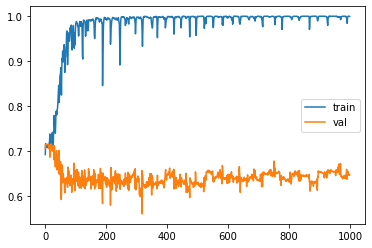

In [71]:
# for train_name in range(0,70):
df = pd.read_csv(datalist[0])
df = signal_to_catagorical(df)

x_train = df[['MACD-SL_n','DMI_n','Close_n','RSI_n','%R_n',]].values
x_train = add_shift_day(x_train,30)
y_train = df['Signal']
y_train = to_categorical(y_train)
y_train = y_train.tolist()
del y_train[0:30]
y_train = np.array(y_train)

r = random.randint(0,2)
val = val_list[1]
val = signal_to_catagorical(val)
x_val = val[['MACD-SL_n','DMI_n','Close_n','RSI_n','%R_n',]].values
x_val = add_shift_day(x_val,30)
y_val = val['Signal']
y_val = to_categorical(y_val)
y_val = y_val.tolist()
del y_val[0:30]
y_val = np.array(y_val)

h = model.fit(x_train, y_train, epochs=1000,validation_data=(x_val,y_val),callbacks=[checkpoint],shuffle=False)
# model.save('Model train/model_lstm2_dataset_'+str(train_name)+'.h5')
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['train', 'val'])
plt.show()

In [56]:
# model = load_model('Model train/model_lstm2_dataset_1.h5')

In [62]:
for test in test_list:
    # print(test)
    test = signal_to_catagorical(test)
    #   print(test)
    x_test = test[['MACD-SL_n','DMI_n','Close_n','RSI_n','%R_n',]].values
    x_test = add_shift_day(x_test,30)
    y_test = test['Signal'].values
    y_test = y_test.tolist()
    del y_test[0:30]
    y_test = np.array(y_test)

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis = -1)
    y_test = y_test.astype('int64')
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(cm)

    
  

Confusion Matrix
[[ 259    0  250]
 [  42   32  236]
 [ 567   83 1138]]
Confusion Matrix
[[ 131   30  320]
 [  58   34  323]
 [ 335  182 1239]]


In [41]:
# model.save('Model/Lstm_model6.h5')

C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Text(0.5, 0, 'Date')

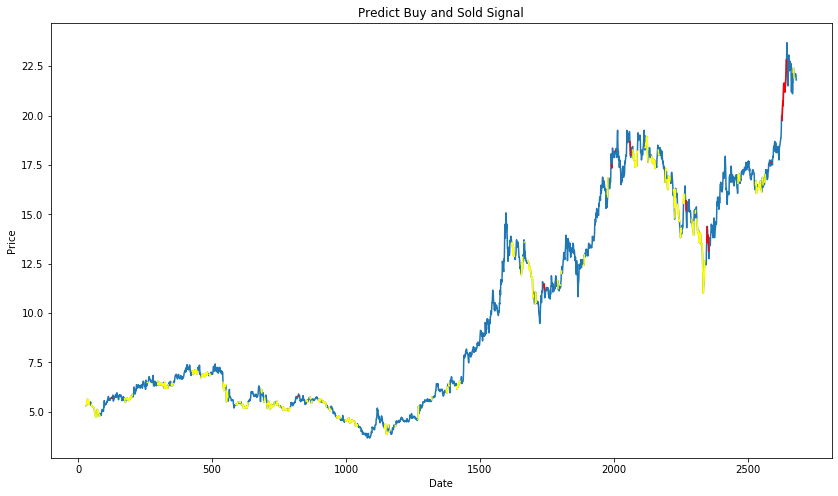

In [43]:
p_test = test_list[1]
p_test = signal_to_catagorical(p_test)
x_test = p_test[['MACD-SL_n','DMI_n','Close_n','RSI_n','%R_n',]].values
x_test = add_shift_day(x_test,30)
y_test = p_test['Signal'].values
y_test = y_test.tolist()
del y_test[0:30]
y_test = np.array(y_test)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = -1)
p_test = p_test.iloc[30:]

p_test['pred'] = y_pred
p_test['pred_b'] = np.where(p_test['pred'] == 0,p_test['Close'],np.nan)
p_test['pred_s'] = np.where(p_test['pred'] == 1,p_test['Close'],np.nan)

plt.figure(figsize=(14,8))
# plt.grid()
plt.title('Predict Buy and Sold Signal')
plt.plot(p_test['Close'])
plt.plot(p_test['pred_b'],color='yellow')
plt.plot(p_test['pred_s'],color='red')
plt.ylabel('Price')
plt.xlabel('Date')

In [9]:
%matplotlib inline